In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

In [2]:
DATA_PATH = "../../Base_de_datos.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

| Columna           | Descripción                                                                 | Tipo de dato |
|------------------|-----------------------------------------------------------------------------|--------------|
| customerID        | Identificador único del cliente.                                            | Categórica nominal |
| gender            | Género del cliente (Male/Female).                                           | Categórica nominal dicotómica |
| SeniorCitizen     | Indica si es adulto mayor (1 = Sí, 0 = No).                                 | Numérica discreta |
| Partner           | Indica si tiene pareja (Yes/No).                                            | Categórica dicotómica |
| Dependents        | Indica si existe dependencia económica (Yes/No).                            | Categórica dicotómica |
| tenure            | Meses de permanencia del cliente en la compañía.                            | Numérica discreta (ordinal) |
| PhoneService      | Indica si tiene servicio telefónico (Yes/No).                               | Categórica dicotómica |
| MultipleLines     | Indica si tiene múltiples líneas telefónicas.                               | Categórica nominal politómica |
| InternetService   | Tipo de servicio de internet (DSL/Fiber optic/No).                          | Categórica nominal politómica |
| OnlineSecurity    | Seguridad en línea (Yes/No/No internet service).                            | Categórica nominal politómica |
| OnlineBackup      | Respaldo en línea (Yes/No/No internet service).                             | Categórica nominal politómica |
| DeviceProtection  | Protección de dispositivo (Yes/No/No internet service).                     | Categórica nominal politómica |
| TechSupport       | Soporte técnico (Yes/No/No internet service).                               | Categórica nominal politómica |
| StreamingTV       | Servicio de streaming TV (Yes/No/No internet service).                      | Categórica nominal politómica |
| StreamingMovies   | Servicio de streaming de películas (Yes/No/No internet service).            | Categórica nominal politómica |
| Contract          | Tipo de contrato (Month-to-month/One year/Two year).                        | Categórica ordinal politómica |
| PaperlessBilling  | Facturación electrónica (Yes/No).                                           | Categórica dicotómica |
| PaymentMethod     | Método de pago utilizado.                                                   | Categórica nominal politómica |
| MonthlyCharges    | Monto mensual facturado al cliente.                                         | Numérica continua |
| TotalCharges      | Total facturado históricamente.                                             | Numérica continua |
| Churn             | Si el cliente abandonó el servicio (Yes/No).                                | Categórica dicotómica (objetivo) |


### Clasificación de variables por tipo

| Tipo de variable                         | Columnas                                                                                      |
|------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Numéricas continuas**                  | MonthlyCharges, TotalCharges                                                                  |
| **Numéricas discretas**                  | SeniorCitizen, tenure                                                                         |
| **Categóricas nominales politómicas**    | gender, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaymentMethod |
| **Categóricas ordinales politómicas**    | Contract                                                                                      |
| **Categóricas dicotómicas**              | Partner, Dependents, PhoneService, PaperlessBilling, Churn (target)                           |
| **Identificador / Irrelevante**          | customerID                                                                                    |
| **Temporales**                           | No aplica                                                                                     |


### Caracterización de datos

Se clasifican las variables del dataset según su tipo estadístico:

- Se consideran **numéricas continuas** aquellas medidas monetarias o que admiten un rango amplio sin restricciones.
- Se consideran **numéricas discretas** aquellas que representan conteos enteros o categorías codificadas como 0/1.
- Las **categóricas nominales politómicas** representan categorías sin orden implícito.
- Las **categóricas ordinales politómicas** representan categorías con un orden natural.
- Las **categóricas dicotómicas** toman solo dos valores posibles (Yes/No → 1/0).
- Se identifica un **ID** no informativo para el modelado.

A continuación, se definen los grupos.


In [ ]:
id_cols = ["customerID"]  # ID único, no aporta valor predictivo

# Categóricas dicotómicas (Yes/No)
binary_cols = [
    "Partner", "Dependents", "PhoneService",
    "PaperlessBilling", "Churn"
]

# Categóricas nominales politómicas (categorías sin orden)
cat_nominal_cols = [
    "gender", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "PaymentMethod"
]

# Categóricas ordinales politómicas (hay orden implícito)
cat_ordinal_cols = ["Contract"]

# Numéricas continuas
num_continuous_cols = ["MonthlyCharges", "TotalCharges"]

# Numéricas discretas
num_discrete_cols = ["SeniorCitizen", "tenure"]

# Target
target = "Churn"

{
    "Identificadores": id_cols,
    "Numéricas continuas": num_continuous_cols,
    "Numéricas discretas": num_discrete_cols,
    "Categóricas nominales politómicas": cat_nominal_cols,
    "Categóricas ordinales politómicas": cat_ordinal_cols,
    "Categóricas dicotómicas": binary_cols,
    "Target": target,
}


{'Identificadores': ['customerID'],
 'Numéricas continuas': ['MonthlyCharges', 'TotalCharges'],
 'Numéricas discretas': ['SeniorCitizen', 'tenure'],
 'Categóricas nominales politómicas': ['gender',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'PaymentMethod'],
 'Categóricas ordinales politómicas': ['Contract'],
 'Categóricas dicotómicas': ['Partner',
  'Dependents',
  'PhoneService',
  'PaperlessBilling',
  'Churn'],
 'Target': 'Churn'}

#### Justificación

- **customerID** → Es un identificador único; no aporta información predictiva → se elimina más adelante.
- **MonthlyCharges, TotalCharges** → Representan montos monetarios → numéricas continuas.
- **SeniorCitizen, tenure** → Son enteros definidos y representan conteos o indicadores → numéricas discretas.
- **Contract** → Tiene orden lógico (Month-to-month < One year < Two year) → categórica ordinal politómica.
- **gender, MultipleLines, InternetService, OnlineSecurity, …, PaymentMethod** → No poseen orden implícito → categóricas nominales politómicas.
- **Partner, Dependents, PhoneService, PaperlessBilling, Churn** → Son binarias (Yes/No) → categóricas dicotómicas.


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

Convertimos TotalCharges a tipo numérico utilizando pd.to_numeric porque, aunque representa un valor monetario continuo, viene cargada como texto debido a espacios vacíos u otros caracteres.

Usamos errors="coerce" para transformar automáticamente en NaN cualquier valor inválido, lo que nos permite manejar después esos casos de forma consistente durante el análisis y la imputación.

In [8]:
for col in (
    ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
     "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
     "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
     "PaperlessBilling", "PaymentMethod", "Churn"]
):
    df[col] = df[col].astype("category")


In [9]:
df.dtypes

customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

Se realizó la conversión de tipos para asegurar que cada variable tenga el formato adecuado según su naturaleza (numérica o categórica). Esto permite aplicar correctamente operaciones estadísticas, análisis exploratorio y transformaciones posteriores. En particular, TotalCharges se convirtió a numérica para poder analizarla como valor continuo y manejar valores inválidos como nulos.

In [10]:
df.drop(columns=["customerID"], inplace=True, errors="ignore")

La columna **customerID** fue eliminada debido a que funciona únicamente como un identificador único y no aporta información relevante para el modelado. 
Este tipo de campos no presenta relación estadística con la variable objetivo ni con otros atributos del cliente. 
Conservarla podría introducir ruido e incrementar dimensionalidad innecesaria, por lo que se descarta antes del análisis exploratorio avanzado y la fase de entrenamiento del modelo.

### Conteo de Valores nulos

In [11]:
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
gender               0
Partner              0
SeniorCitizen        0
Dependents           0
tenure               0
MultipleLines        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
InternetService      0
TechSupport          0
StreamingTV          0
Contract             0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
Churn                0
dtype: int64

El análisis de valores nulos muestra que únicamente la columna **TotalCharges** presenta registros faltantes (11 casos). Esto se debe principalmente a clientes que llevan poco tiempo en el servicio y aún no generan cargos acumulados.

El resto de las variables no presenta valores nulos, por lo que no es necesario aplicar estrategias de imputación adicionales en esta etapa fuera de **TotalCharges**.


### Eliminar Nulos

Los 11 valores nulos en la variable `TotalCharges` corresponden a clientes sin facturación acumulada, típicamente asociados a periodos de permanencia muy bajos. Dado que representan menos del 0.2% de la muestra y su información histórica es limitada, se decidió eliminarlos para evitar imputaciones arbitrarias y preservar la consistencia del análisis.


In [12]:
df = df[~df["TotalCharges"].isna()]

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### EDA 

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]].skew()
df[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]].kurt()

SeniorCitizen     1.353321
tenure           -1.387823
MonthlyCharges   -1.256156
TotalCharges     -0.231799
dtype: float64

Las variables numéricas muestran asimetría significativa, lo que indica distribuciones alejadas de la normalidad.
tenure presenta sesgo negativo, lo que refleja una mayor concentración de clientes recientes; mientras que MonthlyCharges muestra sesgo negativo moderado, indicando mayor presencia de clientes con cargos mensuales elevados. TotalCharges se distribuye de forma casi simétrica, consistente con su relación directa con tenure. Estos patrones sugieren variabilidad importante en la base, lo cual podría influir en la predicción de churn.

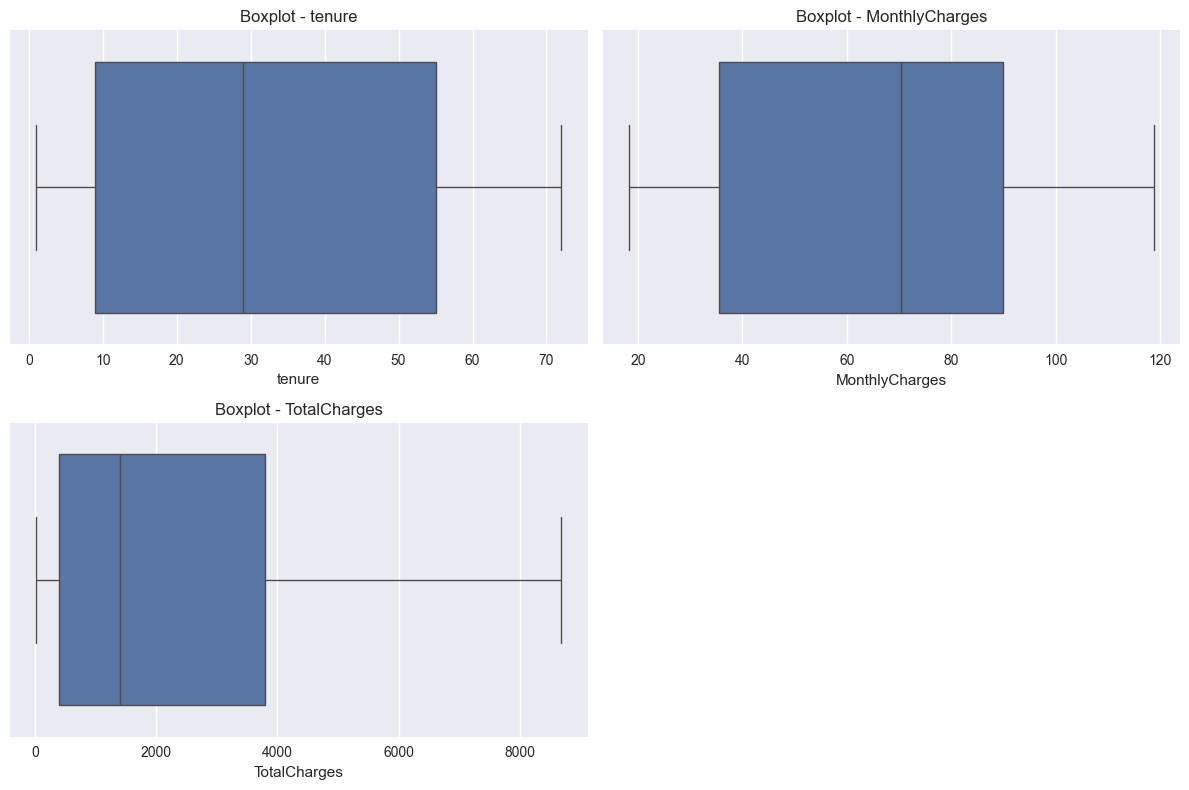

In [38]:

cols = ["tenure", "MonthlyCharges", "TotalCharges"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)   
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()


Las variables numéricas analizadas —tenure, MonthlyCharges y TotalCharges— muestran patrones consistentes con el comportamiento esperado de los clientes. La permanencia (tenure) presenta una distribución amplia, lo que refleja la coexistencia de usuarios nuevos y otros con relaciones prolongadas con la compañía. Los cargos mensuales (MonthlyCharges) se concentran principalmente entre valores medios, sugiriendo que la mayoría de clientes contrata planes de costo moderado. Por su parte, el monto total facturado (TotalCharges) exhibe gran dispersión, estrechamente asociada al tiempo de permanencia, pues los clientes con mayor tenure son quienes acumulan los valores más altos. En conjunto, estas métricas permiten identificar diferencias de consumo y antigüedad que podrían ser determinantes para comprender patrones de comportamiento y abandono del servicio.

In [40]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen: Presenta un promedio de 0.16, lo que confirma que solo alrededor del 16% de los clientes son adultos mayores. La desviación estándar reducida indica baja variabilidad en esta característica.

tenure (meses de permanencia): El cliente promedio ha permanecido 32 meses, pero con una alta dispersión (std ≈ 24.5), evidenciando un comportamiento heterogéneo.
El rango es amplio (1–72 meses) y la mediana cercana a 29 sugiere que la mayoría lleva menos de 3 años en la compañía.

MonthlyCharges (costo mensual): El cargo mensual promedio es de $64.8, con una desviación estándar de 30, lo cual muestra diferencias claras según el tipo de servicio contratado.
El IQR entre ~36 y ~90 indica que muchos clientes pagan de manera moderada, pero hay un segmento de alto costo.

TotalCharges (monto total facturado): Presenta una media de $2,283, pero los valores fluctúan ampliamente (18–8,684), lo que está alineado con la variabilidad del tenure.
La distribución está muy dispersa (std ≈ 2,267), lo que es coherente porque clientes recientes acumulan poco total facturado frente a clientes antiguos.

Las variables monetarias presentan alta variabilidad y son fuertemente dependientes del tiempo de permanencia del cliente, lo que sugiere que tenure, MonthlyCharges y TotalCharges podrían ser factores influyentes en el churn, mientras que SeniorCitizen muestra menor contribución esperada dado su bajo peso dentro de la población.

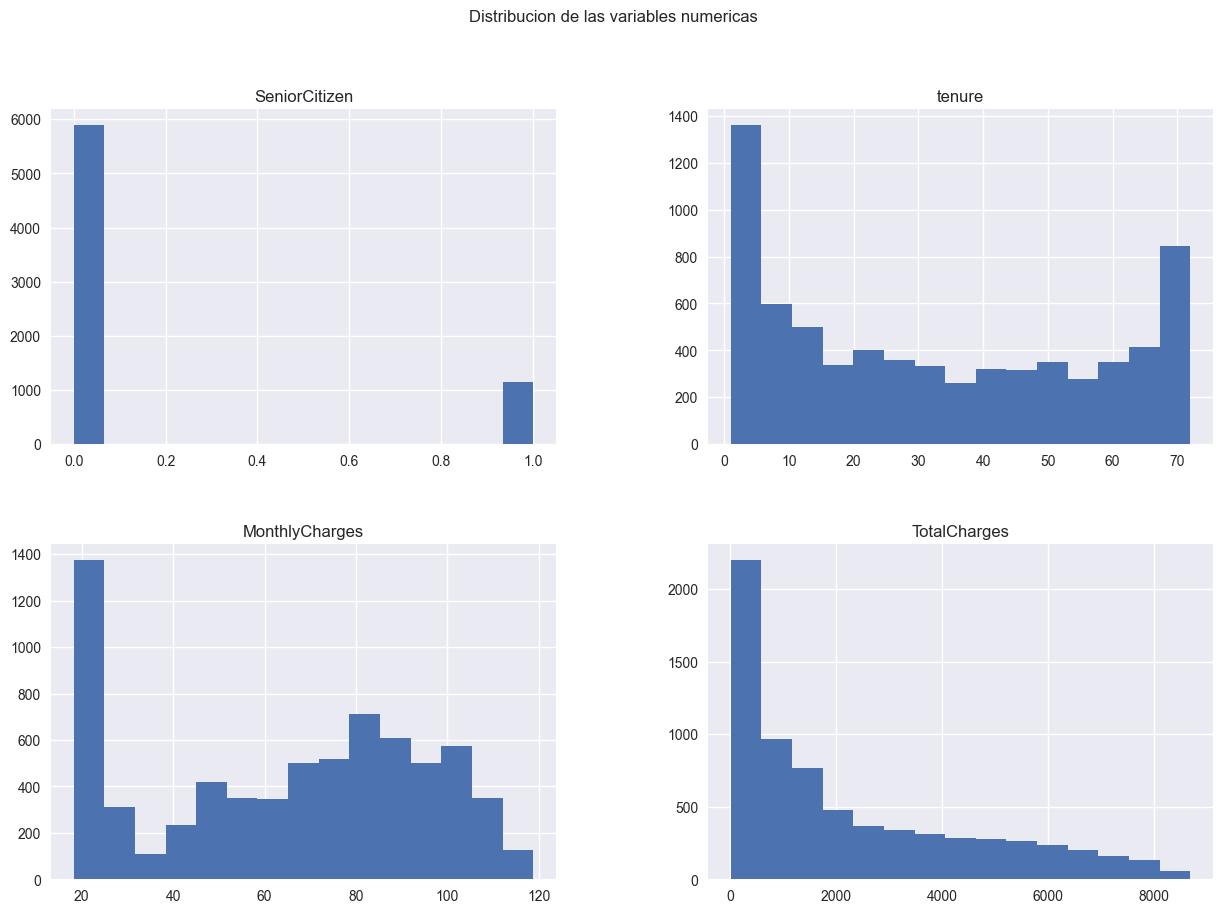

In [15]:
df.select_dtypes(include=np.number).hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribucion de las variables numericas')
plt.show()

El análisis univariado de las variables numéricas muestra patrones interesantes:

- `SeniorCitizen` está altamente desbalanceada, indicando que la mayoría de los clientes no son adultos mayores.
- `tenure` se concentra en valores bajos (clientes recientes), con una menor proporción de clientes de larga permanencia. Esta variable probablemente influye fuertemente en la deserción.
- `MonthlyCharges` presenta una distribución bimodal, lo que sugiere diferentes grupos de planes o niveles de servicios. Esto podría influir en el comportamiento del cliente.
- `TotalCharges` exhibe una fuerte asimetría positiva, consistente con su naturaleza acumulativa respecto a la permanencia del cliente.

Estos patrones sugieren que `tenure`, `MonthlyCharges` y `TotalCharges` serán variables clave en etapas posteriores del modelado.


#### EDA - Categoricas

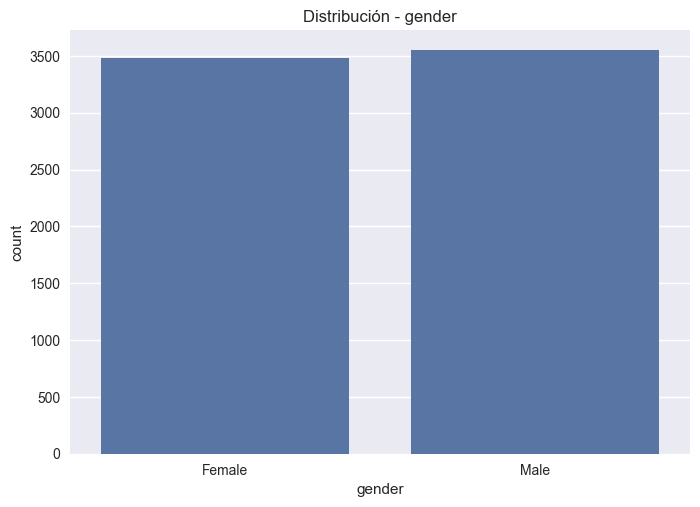

(gender
 Male      3549
 Female    3483
 Name: count, dtype: int64,
 gender
 Male      50.47
 Female    49.53
 Name: proportion, dtype: float64)

In [17]:
# EDA - gender
sns.countplot(x=df["gender"])
plt.title("Distribución - gender")
plt.show()
df["gender"].value_counts(), (df["gender"].value_counts(normalize=True)*100).round(2)

La distribución de gender es prácticamente 50/50 entre hombres y mujeres, lo que indica que no existe un sesgo poblacional hacia un género específico dentro de la base de clientes. Desde la perspectiva de negocio, esto sugiere que no hay un segmento predominante por género, por lo que estrategias comerciales o de retención enfocadas únicamente en este atributo no serían prioritarias. Se conservará esta variable para el análisis posterior; sin embargo, debido a su equilibrio y naturaleza, se anticipa que su aporte explicativo frente al churn será bajo.

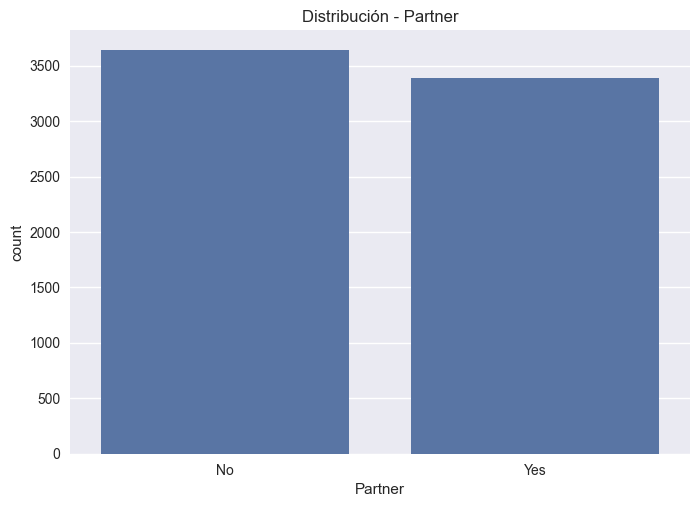

(Partner
 No     3639
 Yes    3393
 Name: count, dtype: int64,
 Partner
 No     51.75
 Yes    48.25
 Name: proportion, dtype: float64)

In [18]:
# EDA - Partner
sns.countplot(x=df["Partner"])
plt.title("Distribución - Partner")
plt.show()
df["Partner"].value_counts(), (df["Partner"].value_counts(normalize=True)*100).round(2)

La distribución entre clientes con pareja (Yes) y sin pareja (No) es bastante equilibrada, con una ligera mayoría de usuarios sin pareja. Esto refleja que la base de clientes incluye perfiles familiares y no familiares en proporciones similares, lo que sugiere que el servicio es adquirido sin una marcada influencia del estado convivencial.

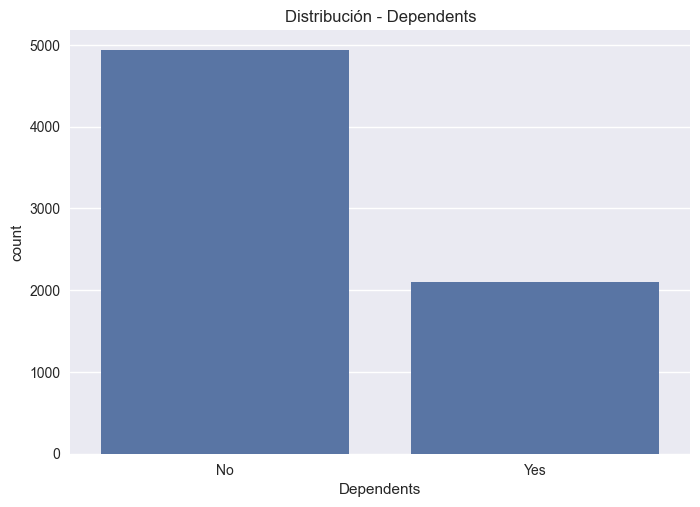

(Dependents
 No     4933
 Yes    2099
 Name: count, dtype: int64,
 Dependents
 No     70.15
 Yes    29.85
 Name: proportion, dtype: float64)

In [19]:
# EDA - Dependents
sns.countplot(x=df["Dependents"])
plt.title("Distribución - Dependents")
plt.show()
df["Dependents"].value_counts(), (df["Dependents"].value_counts(normalize=True)*100).round(2)

La mayoría de clientes no cuenta con dependientes, representando más del doble frente a quienes sí tienen. Esto sugiere que el perfil predominante corresponde a personas sin cargas familiares, lo que podría estar asociado a decisiones de contratación más individuales.

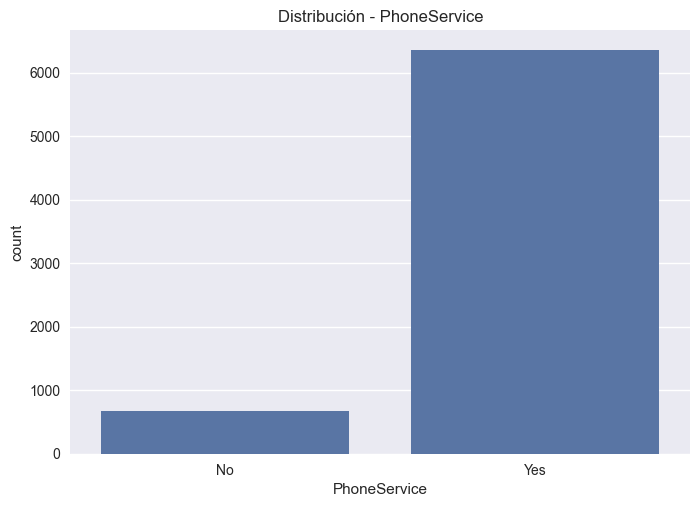

(PhoneService
 Yes    6352
 No      680
 Name: count, dtype: int64,
 PhoneService
 Yes    90.33
 No      9.67
 Name: proportion, dtype: float64)

In [20]:
# EDA - PhoneService
sns.countplot(x=df["PhoneService"])
plt.title("Distribución - PhoneService")
plt.show()
df["PhoneService"].value_counts(), (df["PhoneService"].value_counts(normalize=True)*100).round(2)

La gran mayoría de clientes (≈90%) cuenta con servicio telefónico, mientras que solo una pequeña proporción prescinde de él.
Esto indica que el servicio de telefonía es parte del paquete básico más adquirido, posiblemente porque funciona como puerta de entrada a otros servicios del operador.

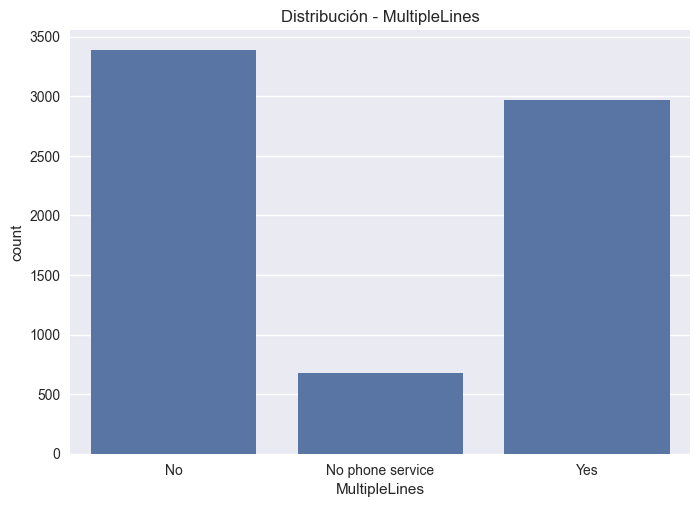

(MultipleLines
 No                  3385
 Yes                 2967
 No phone service     680
 Name: count, dtype: int64,
 MultipleLines
 No                  48.14
 Yes                 42.19
 No phone service     9.67
 Name: proportion, dtype: float64)

In [21]:
# EDA - MultipleLines
sns.countplot(x=df["MultipleLines"])
plt.title("Distribución - MultipleLines")
plt.show()
df["MultipleLines"].value_counts(), (df["MultipleLines"].value_counts(normalize=True)*100).round(2)

La mayoría de los clientes posee una sola línea telefónica, aunque una proporción considerable también cuenta con múltiples líneas. Esto refleja un mercado mixto, donde los usuarios pueden ampliar servicios según sus necesidades, posiblemente influenciados por el tipo de plan o uso familiar.

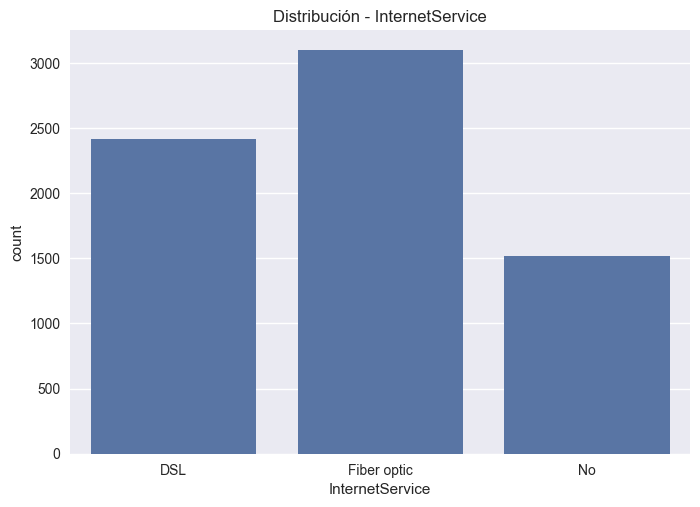

(InternetService
 Fiber optic    3096
 DSL            2416
 No             1520
 Name: count, dtype: int64,
 InternetService
 Fiber optic    44.03
 DSL            34.36
 No             21.62
 Name: proportion, dtype: float64)

In [22]:
# EDA - InternetService
sns.countplot(x=df["InternetService"])
plt.title("Distribución - InternetService")
plt.show()
df["InternetService"].value_counts(), (df["InternetService"].value_counts(normalize=True)*100).round(2)

El servicio de fibra óptica es el más contratado, seguido por DSL, mientras que un grupo menor no tiene servicio de internet. Esto indica una fuerte preferencia por conexiones de mayor velocidad, lo que podría relacionarse con clientes de mayor valor o permanencia.

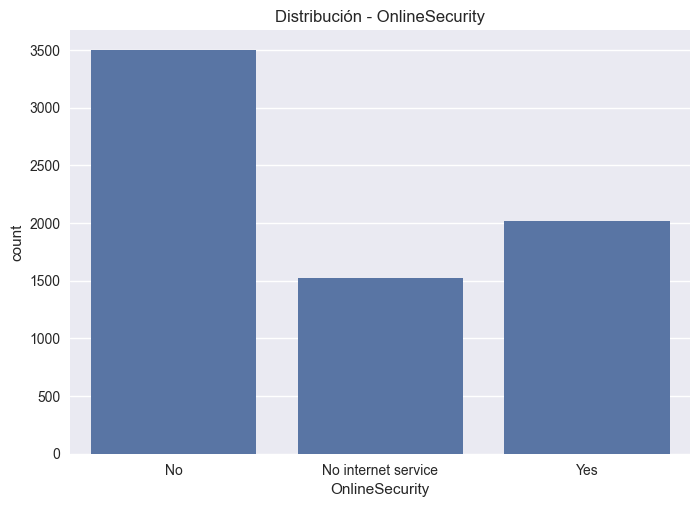

(OnlineSecurity
 No                     3497
 Yes                    2015
 No internet service    1520
 Name: count, dtype: int64,
 OnlineSecurity
 No                     49.73
 Yes                    28.65
 No internet service    21.62
 Name: proportion, dtype: float64)

In [23]:
# EDA - OnlineSecurity
sns.countplot(x=df["OnlineSecurity"])
plt.title("Distribución - OnlineSecurity")
plt.show()
df["OnlineSecurity"].value_counts(), (df["OnlineSecurity"].value_counts(normalize=True)*100).round(2)

Más de la mitad de los clientes no tiene contratado el servicio de seguridad en línea, a pesar de ser una funcionalidad complementaria al internet. Esto puede reflejar una oportunidad comercial para promover servicios adicionales enfocados en protección y ciberseguridad.

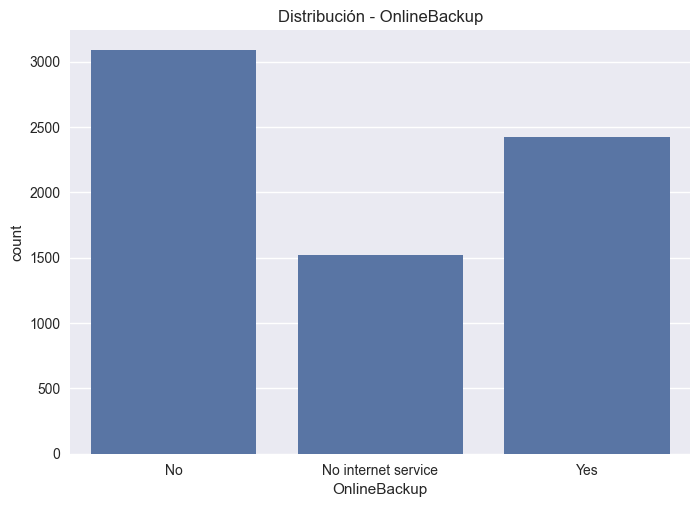

(OnlineBackup
 No                     3087
 Yes                    2425
 No internet service    1520
 Name: count, dtype: int64,
 OnlineBackup
 No                     43.90
 Yes                    34.49
 No internet service    21.62
 Name: proportion, dtype: float64)

In [24]:
# EDA - OnlineBackup
sns.countplot(x=df["OnlineBackup"])
plt.title("Distribución - OnlineBackup")
plt.show()
df["OnlineBackup"].value_counts(), (df["OnlineBackup"].value_counts(normalize=True)*100).round(2)

La mayoría de clientes no utiliza el servicio de respaldo en línea, mientras que cerca de un tercio sí lo tiene contratado. Un porcentaje relevante no cuenta con servicio de internet, lo que limita la adopción de este producto. Esto sugiere una posible oportunidad comercial para promover servicios adicionales entre quienes sí tienen internet activo.

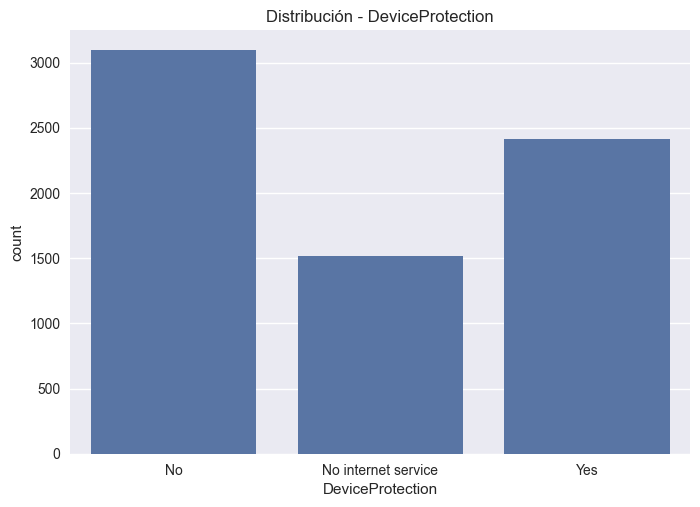

(DeviceProtection
 No                     3094
 Yes                    2418
 No internet service    1520
 Name: count, dtype: int64,
 DeviceProtection
 No                     44.00
 Yes                    34.39
 No internet service    21.62
 Name: proportion, dtype: float64)

In [25]:
# EDA - DeviceProtection
sns.countplot(x=df["DeviceProtection"])
plt.title("Distribución - DeviceProtection")
plt.show()
df["DeviceProtection"].value_counts(), (df["DeviceProtection"].value_counts(normalize=True)*100).round(2)

Más del 40% de los clientes no tiene protección de dispositivos, pese a contar con conexión. La adopción del servicio se ubica alrededor de un tercio, lo que indica espacio para impulsar ventas cruzadas. La baja penetración puede reflejar falta de percepción de valor o desconocimiento del servicio.

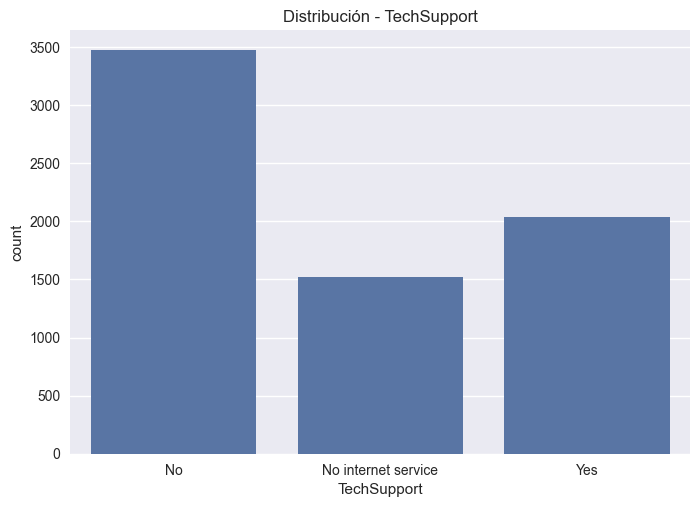

(TechSupport
 No                     3472
 Yes                    2040
 No internet service    1520
 Name: count, dtype: int64,
 TechSupport
 No                     49.37
 Yes                    29.01
 No internet service    21.62
 Name: proportion, dtype: float64)

In [26]:
# EDA - TechSupport
sns.countplot(x=df["TechSupport"])
plt.title("Distribución - TechSupport")
plt.show()
df["TechSupport"].value_counts(), (df["TechSupport"].value_counts(normalize=True)*100).round(2)

La mayoría de usuarios no cuenta con soporte técnico contratado, mientras que cerca de un 30% sí lo ha adquirido. Dado que una porción significativa utiliza internet pero no opta por soporte, podría existir una brecha en atención o incentivos para este servicio. Representa un área con potencial para mejorar experiencia e ingresos adicionales.

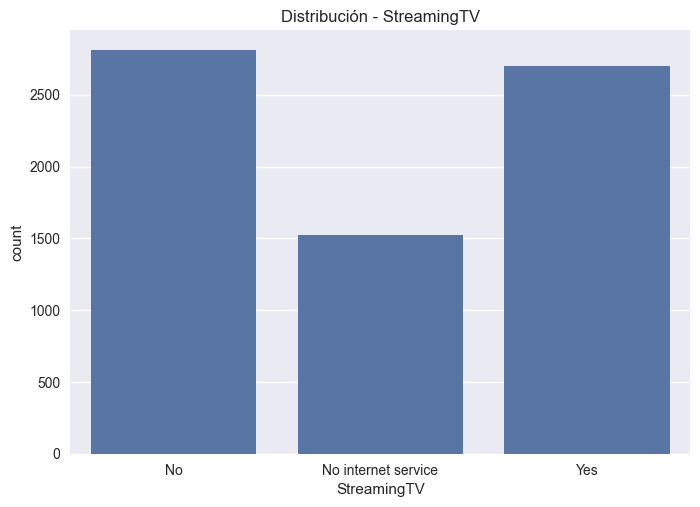

(StreamingTV
 No                     2809
 Yes                    2703
 No internet service    1520
 Name: count, dtype: int64,
 StreamingTV
 No                     39.95
 Yes                    38.44
 No internet service    21.62
 Name: proportion, dtype: float64)

In [27]:
# EDA - StreamingTV
sns.countplot(x=df["StreamingTV"])
plt.title("Distribución - StreamingTV")
plt.show()
df["StreamingTV"].value_counts(), (df["StreamingTV"].value_counts(normalize=True)*100).round(2)

Existe una distribución equilibrada entre quienes consumen TV por streaming y quienes no, mientras que un grupo menor no posee servicio de internet. Esta diversidad sugiere que el entretenimiento digital es demandado, pero no es universal; la adopción podría estar relacionada con hábitos personales o paquetes contratados.

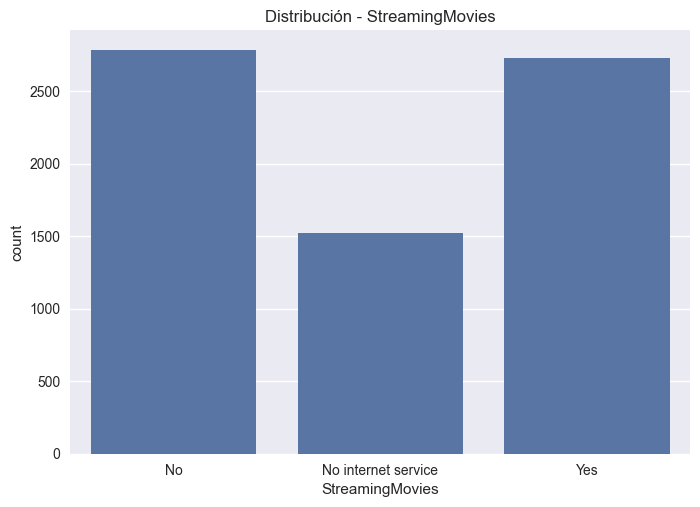

(StreamingMovies
 No                     2781
 Yes                    2731
 No internet service    1520
 Name: count, dtype: int64,
 StreamingMovies
 No                     39.55
 Yes                    38.84
 No internet service    21.62
 Name: proportion, dtype: float64)

In [28]:
# EDA - StreamingMovies
sns.countplot(x=df["StreamingMovies"])
plt.title("Distribución - StreamingMovies")
plt.show()
df["StreamingMovies"].value_counts(), (df["StreamingMovies"].value_counts(normalize=True)*100).round(2)

La distribución entre quienes tienen (Yes) y no tienen (No) servicio de streaming es bastante equilibrada, con un ligero mayor peso en los no suscritos. Esto indica que el consumo de entretenimiento por streaming no es un driver dominante dentro de la oferta, aunque mantiene relevancia comercial.

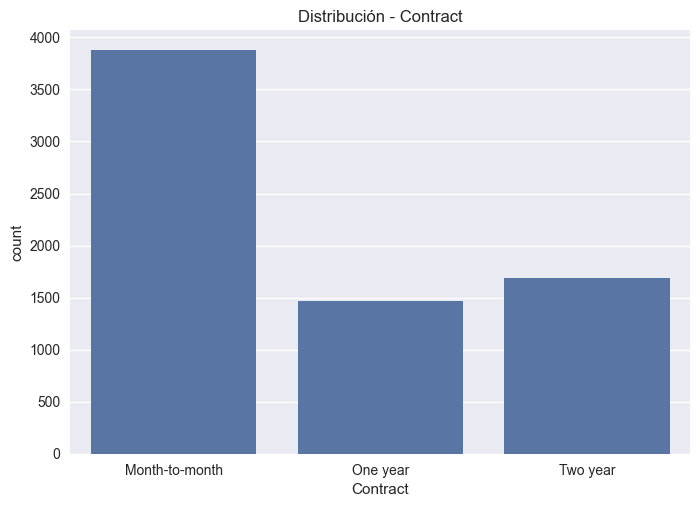

(Contract
 Month-to-month    3875
 Two year          1685
 One year          1472
 Name: count, dtype: int64,
 Contract
 Month-to-month    55.11
 Two year          23.96
 One year          20.93
 Name: proportion, dtype: float64)

In [29]:
# EDA - Contract
sns.countplot(x=df["Contract"])
plt.title("Distribución - Contract")
plt.show()
df["Contract"].value_counts(), (df["Contract"].value_counts(normalize=True)*100).round(2)

La mayoría de clientes está suscrita a contratos mensuales (Month-to-month), seguidos por los contratos de dos años y uno.
Este predominio de contratos de corto plazo puede implicar mayor propensión al churn, dado que los clientes tienen menos fricción para cancelar. Esto sugiere una oportunidad para diseñar estrategias que incentiven permanencias más largas.

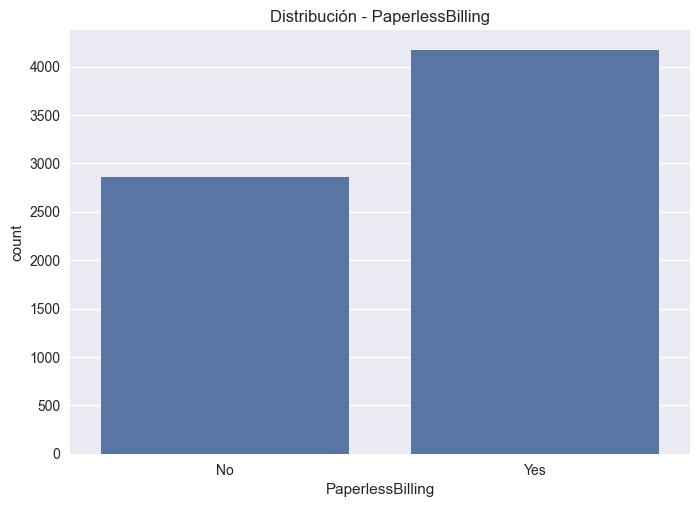

(PaperlessBilling
 Yes    4168
 No     2864
 Name: count, dtype: int64,
 PaperlessBilling
 Yes    59.27
 No     40.73
 Name: proportion, dtype: float64)

In [30]:
# EDA - PaperlessBilling
sns.countplot(x=df["PaperlessBilling"])
plt.title("Distribución - PaperlessBilling")
plt.show()
df["PaperlessBilling"].value_counts(), (df["PaperlessBilling"].value_counts(normalize=True)*100).round(2)

Predomina el uso de facturación electrónica, lo que sugiere una mayor adopción de canales digitales.
Esto puede relacionarse con perfiles más conectados tecnológicamente, potencialmente más sensibles a la experiencia digital.

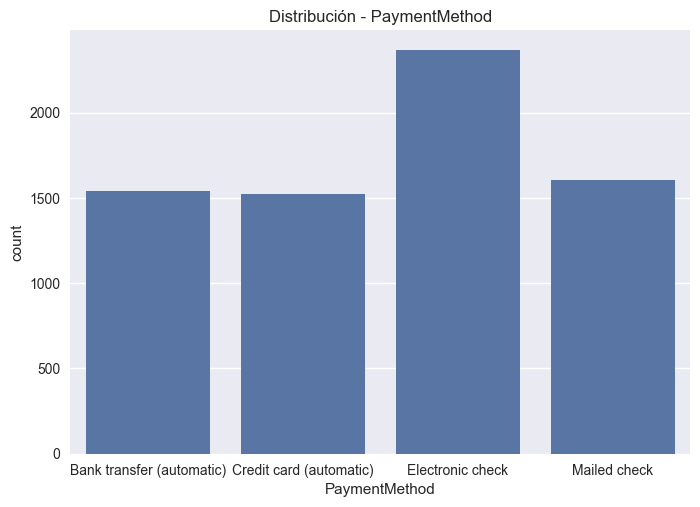

(PaymentMethod
 Electronic check             2365
 Mailed check                 1604
 Bank transfer (automatic)    1542
 Credit card (automatic)      1521
 Name: count, dtype: int64,
 PaymentMethod
 Electronic check             33.63
 Mailed check                 22.81
 Bank transfer (automatic)    21.93
 Credit card (automatic)      21.63
 Name: proportion, dtype: float64)

In [31]:
# EDA - PaymentMethod
sns.countplot(x=df["PaymentMethod"])
plt.title("Distribución - PaymentMethod")
plt.show()
df["PaymentMethod"].value_counts(), (df["PaymentMethod"].value_counts(normalize=True)*100).round(2)

Predomina el uso de facturación electrónica, lo que sugiere una mayor adopción de canales digitales.
Esto puede relacionarse con perfiles más conectados tecnológicamente, potencialmente más sensibles a la experiencia digital.

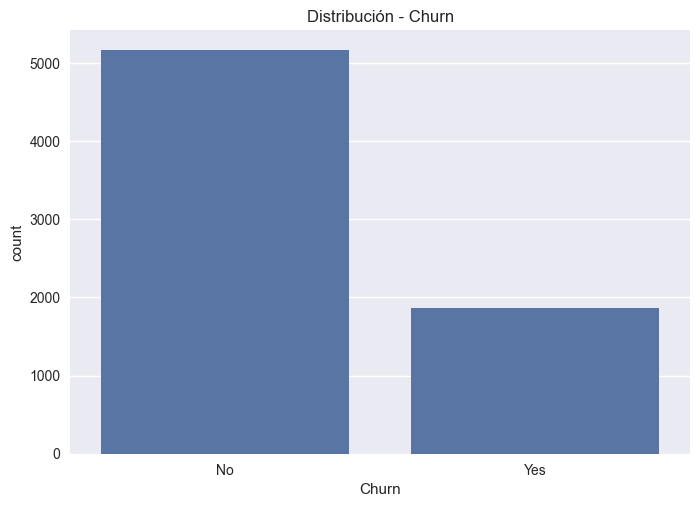

(Churn
 No     5163
 Yes    1869
 Name: count, dtype: int64,
 Churn
 No     73.42
 Yes    26.58
 Name: proportion, dtype: float64)

In [32]:
# EDA - Churn
sns.countplot(x=df["Churn"])
plt.title("Distribución - Churn")
plt.show()
df["Churn"].value_counts(), (df["Churn"].value_counts(normalize=True)*100).round(2)

La mayoría de clientes no abandona el servicio (≈73%), mientras que cerca del 27% sí churn.
Aunque la mayoría permanece, la proporción de salida es significativa y justifica la construcción de modelos predictivos para identificar segmentos críticos y reducir la pérdida de clientes.

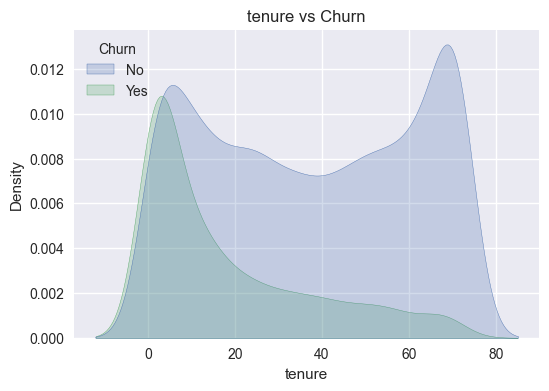

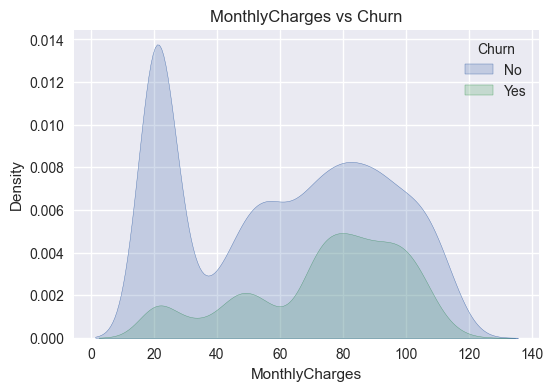

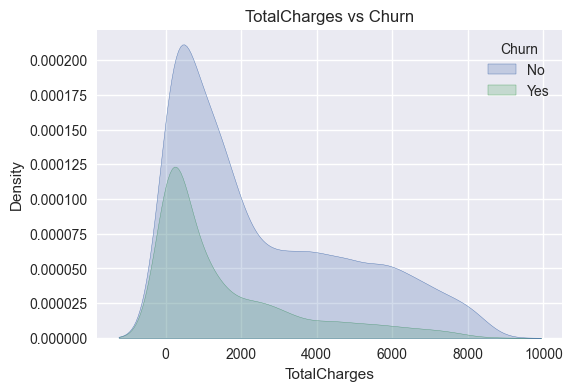

In [55]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="Churn", fill=True)
    plt.title(f"{col} vs Churn")
    plt.show()


Tenure vs Churn:La permanencia (tenure) muestra una fuerte relación con el churn.
Los clientes que abandonan se concentran en los primeros meses, especialmente antes de cumplir 12–18 meses, mientras que quienes permanecen más tiempo presentan una probabilidad mucho menor de cancelar.
En cuanto al negocio los primeros meses son críticos. Implementar estrategias de onboarding y fidelización temprana (descuentos iniciales, acompañamiento, beneficios) puede reducir fuertemente el churn.

MonthlyCharges vs Churn: Los clientes con churn se concentran mayormente en rangos de cobro medios y altos, mientras que quienes permanecen suelen ubicarse en niveles más bajos del costo mensual.
En cuanto al negocio los planes más costosos generan mayor deserción. Es clave revisar precios, ofrecer planes escalonados o beneficios de valor agregado para este segmento sensible al precio.

TotalCharges vs Churn:El monto total pagado muestra que quienes cancelan acumulan bajo historial de facturación, coherente con que tiendan a irse en etapas tempranas.
Los clientes con mayor gasto total casi no abandonan.
En cuanto al negocio los clientes nuevos o de menor antigüedad deben ser prioridad en programas de retención. Aquellos con historial largo son de alta lealtad y representan un segmento clave para potenciar con venta cruzada.

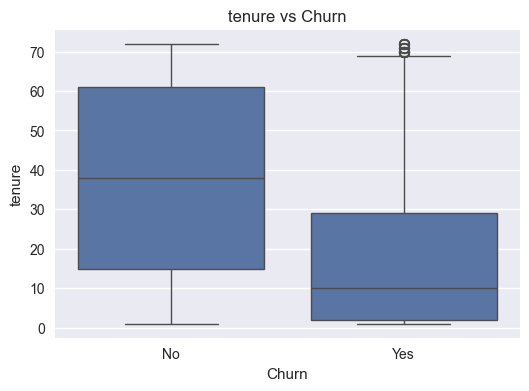

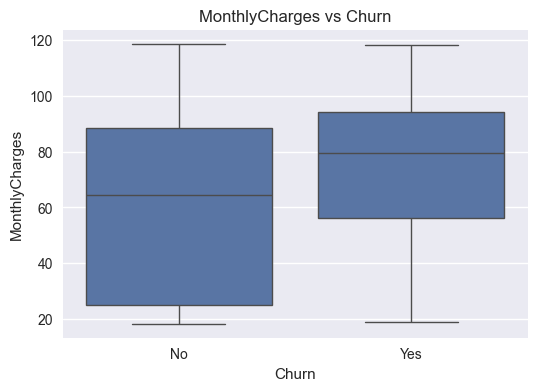

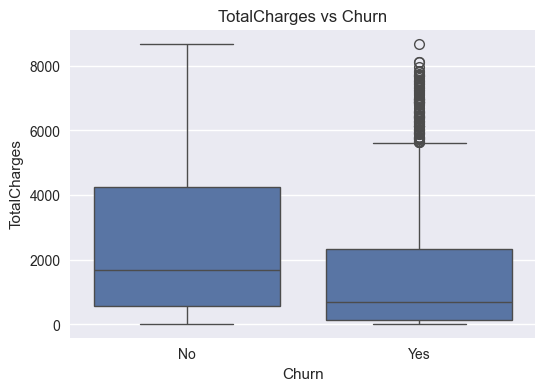

In [56]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


tenure vs Churn: Los clientes que se dan de baja presentan tiempos de permanencia considerablemente menores.
La mayoría del churn ocurre en los primeros meses, mientras que quienes permanecen muestran valores más altos y mayor dispersión. Esto confirma que la deserción está altamente asociada con clientes recientes, lo que evidencia la importancia de fortalecer la experiencia temprana del usuario para aumentar la retención.

MonthlyCharges vs Churn:Los clientes que abandonan exhiben cargos mensuales más altos en comparación con quienes permanecen.
La mediana y el rango intercuartílico son mayores para el grupo que realiza churn, lo que sugiere sensibilidad al precio o percepción insuficiente de valor frente al costo.Clientes con servicios más costosos son más propensos a desertar, representando un segmento que requiere estrategias de ajuste de planes, descuentos o diferenciación de valor.

TotalCharges vs Churn:El monto total facturado es significativamente menor para clientes que realizaron churn.
Esto está alineado con su corta permanencia, ya que abandonan antes de acumular un nivel de facturación elevado. El churn se concentra en clientes de bajo valor histórico, reforzando la necesidad de trabajar en programas de retención temprana para aumentar su lifetime value.

In [42]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")*100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


La duración del contrato muestra una relación clara con la tasa de cancelación (churn).
Los clientes con contratos mensuales (Month-to-month) presentan la tasa de churn más alta, aproximadamente 42.7%, lo que indica una mayor propensión a abandonar el servicio.
En contraste, los clientes con contratos anuales (One year) y especialmente los de dos años (Two year) presentan tasas de churn mucho menores (11.3% y 2.8% respectivamente), evidenciando que los compromisos a mayor plazo generan una mayor retención.
Los contratos a largo plazo funcionan como un mecanismo efectivo de fidelización. Esto sugiere que promover planes anuales o de dos años (por medio de descuentos o beneficios adicionales) podría reducir significativamente la deserción.

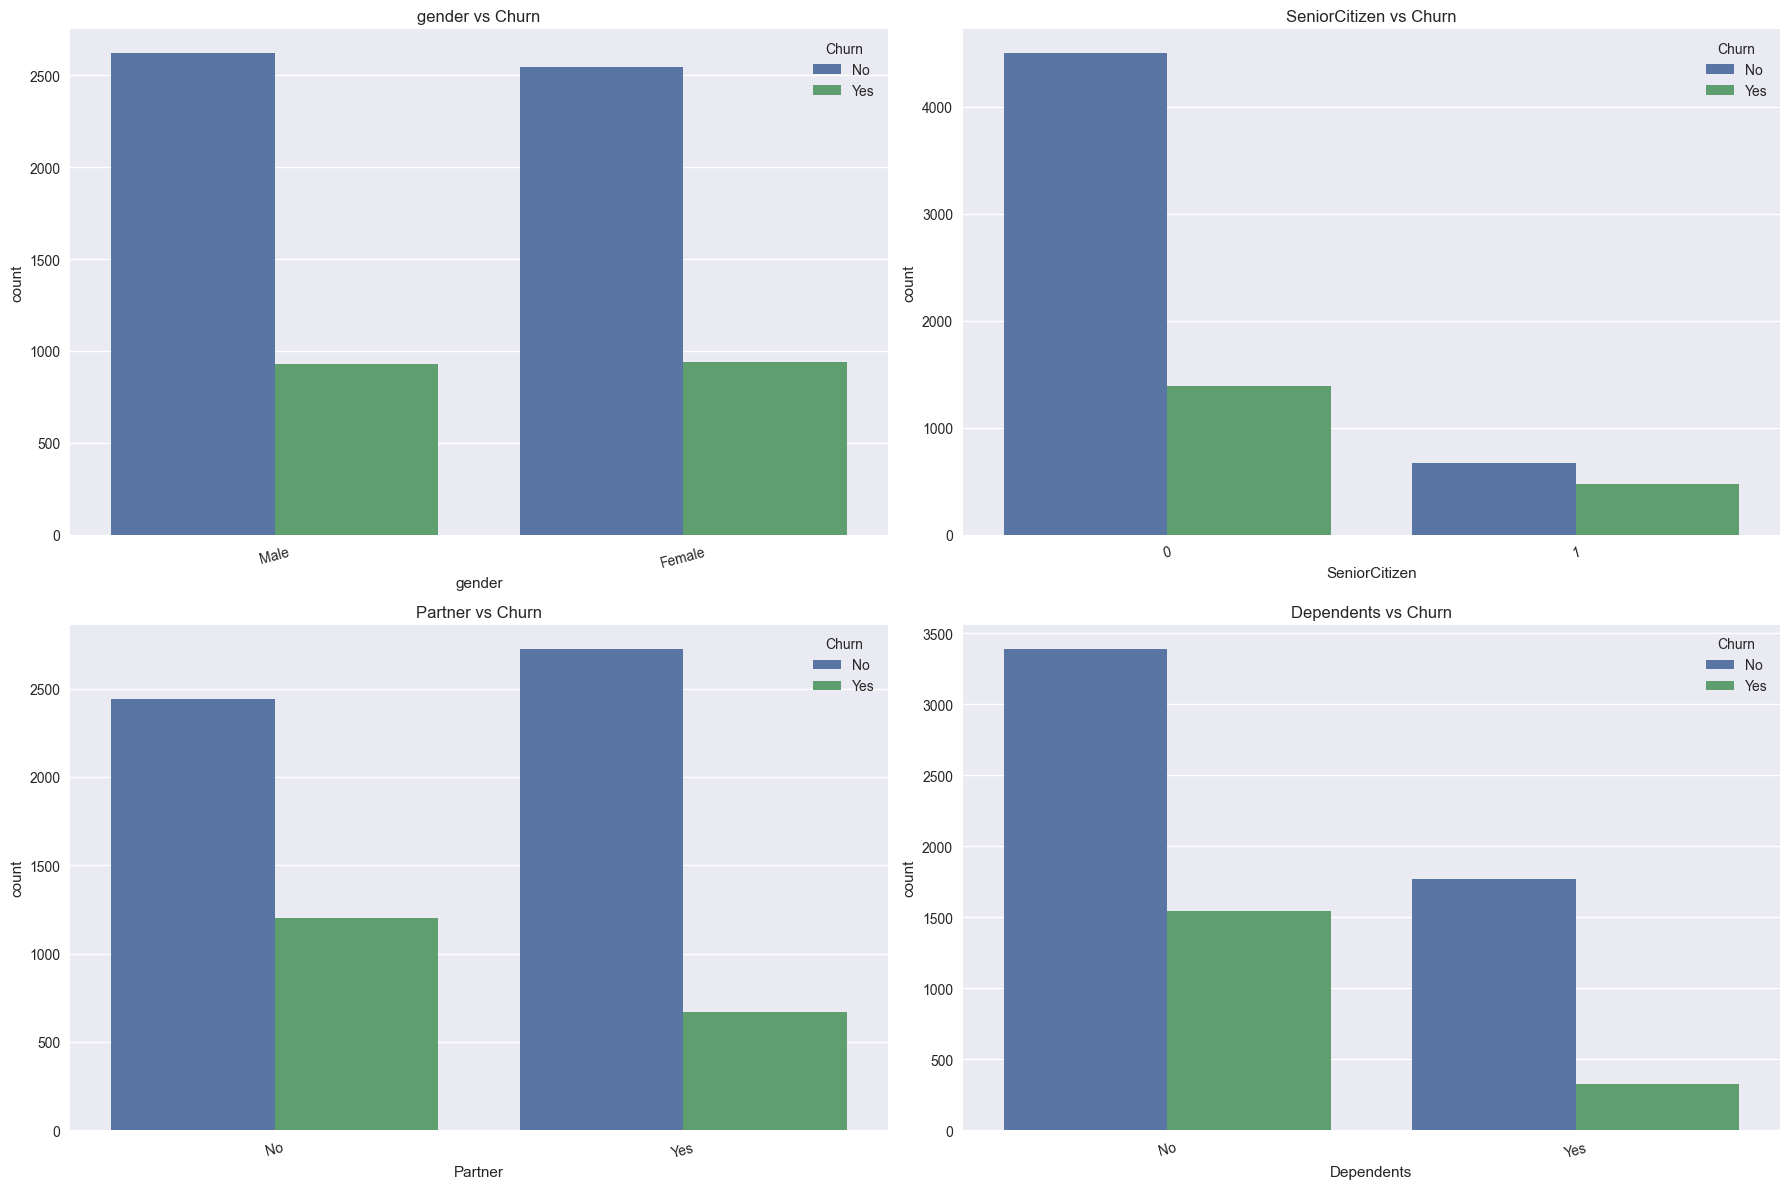

In [49]:
categoricas = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

# Primer bloque (4 variables)
subset = categoricas[0:4]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for j, col in enumerate(subset):
    sns.countplot(x=col, hue="Churn", data=df,
                  order=df[col].value_counts().index,
                  ax=axes[j])
    axes[j].set_title(f"{col} vs Churn")
    axes[j].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


gender vs Churn: La tasa de churn entre hombres y mujeres es prácticamente idéntica (~27%).
Esto confirma que el género no influye significativamente en la probabilidad de abandono, por lo que estrategias diferenciadas por este atributo no aportarían valor comercial.

SeniorCitizen vs Churn: Los adultos mayores (SeniorCitizen = 1) presentan una tasa de churn claramente mayor (≈42%) en comparación con el resto (≈24%).
Esto sugiere que los clientes senior son más propensos a abandonar, posiblemente por sensibilidad al costo, dificultad de uso o cambios en sus necesidades.
* Segmento crítico para desarrollar estrategias de retención.

Partner vs Churn: Los clientes sin pareja presentan una tasa de abandono notablemente superior (~33%) frente a quienes sí tienen pareja (~20%).
Esto sugiere que los hogares o clientes acompañados tienden a ser más estables y permanecen más tiempo, mientras que usuarios individuales son más propensos a rotar de proveedor.
* Oportunidad para enfocar estrategias de retención en clientes individuales.

Dependents vs Churn: Los clientes con dependientes presentan una tasa de churn mucho menor (≈16%) frente a quienes no los tienen (~31%).
Esto respalda la hipótesis de que clientes con cargas familiares muestran mayor estabilidad y mayor valor potencial en el tiempo.
* Segmento interesante para estrategias de fidelización y venta cruzada.

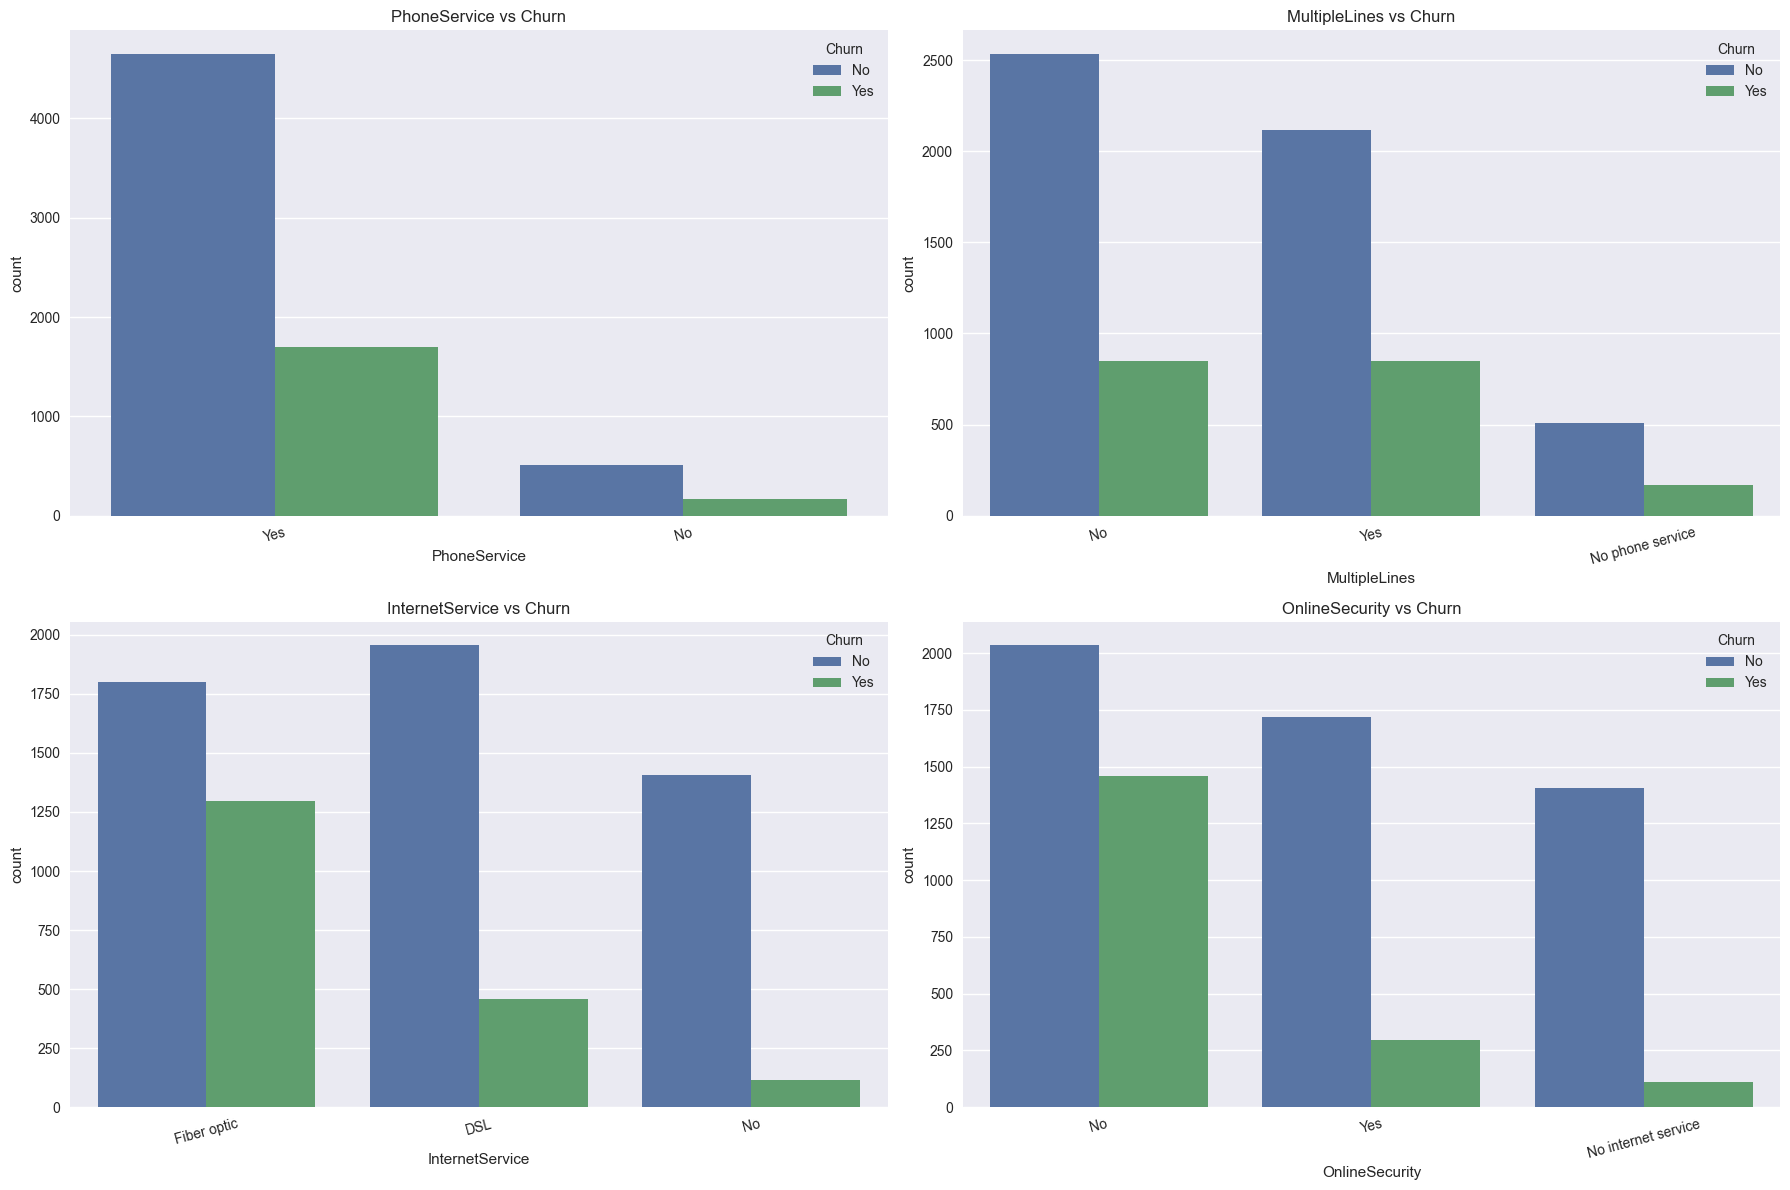

In [50]:
subset = categoricas[4:8]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for j, col in enumerate(subset):
    sns.countplot(x=col, hue="Churn", data=df,
                  order=df[col].value_counts().index,
                  ax=axes[j])
    axes[j].set_title(f"{col} vs Churn")
    axes[j].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


PhoneService vs Churn: La proporción de churn es similar entre quienes poseen o no servicio telefónico, lo que confirma que este atributo no ejerce una influencia relevante en la probabilidad de abandono.
Dado que la mayoría de los clientes sí tienen PhoneService, su impacto es marginal en la explicación del churn.
* No representa un foco prioritario para acciones de retención.

MultipleLines vs Churn: Los clientes que cuentan con múltiples líneas presentan una tasa de churn mayor que quienes tienen solo una línea o no poseen servicio.
Esta diferencia sugiere que el uso de múltiples líneas puede estar asociado a mayores costos o a una percepción de menor valor.
* Podría evaluarse ofrecer paquetes con precio diferencial o beneficios adicionales para este grupo.

InternetService vs ChurnEl tipo de servicio de Internet muestra una relación clara con el churn.
Los clientes con fibra óptica presentan una tasa de abandono considerablemente mayor frente a los usuarios de DSL o quienes no tienen servicio de Internet.
E: sto puede indicar insatisfacción por costos, calidad o expectativas no cumplidas.
* Segmento prioritario para intervención: revisar valor percibido, precios o calidad de servicio.

OnlineSecurity vs Churn: Los clientes sin servicio de seguridad en línea presentan una tasa de churn visiblemente superior frente a quienes sí cuentan con este servicio.
Esto sugiere que OnlineSecurity actúa como un factor protector, posiblemente al aumentar la percepción de valor o satisfacción.
* Oportunidad de retención: ofrecer seguridad como beneficio incluido o con descuentos.

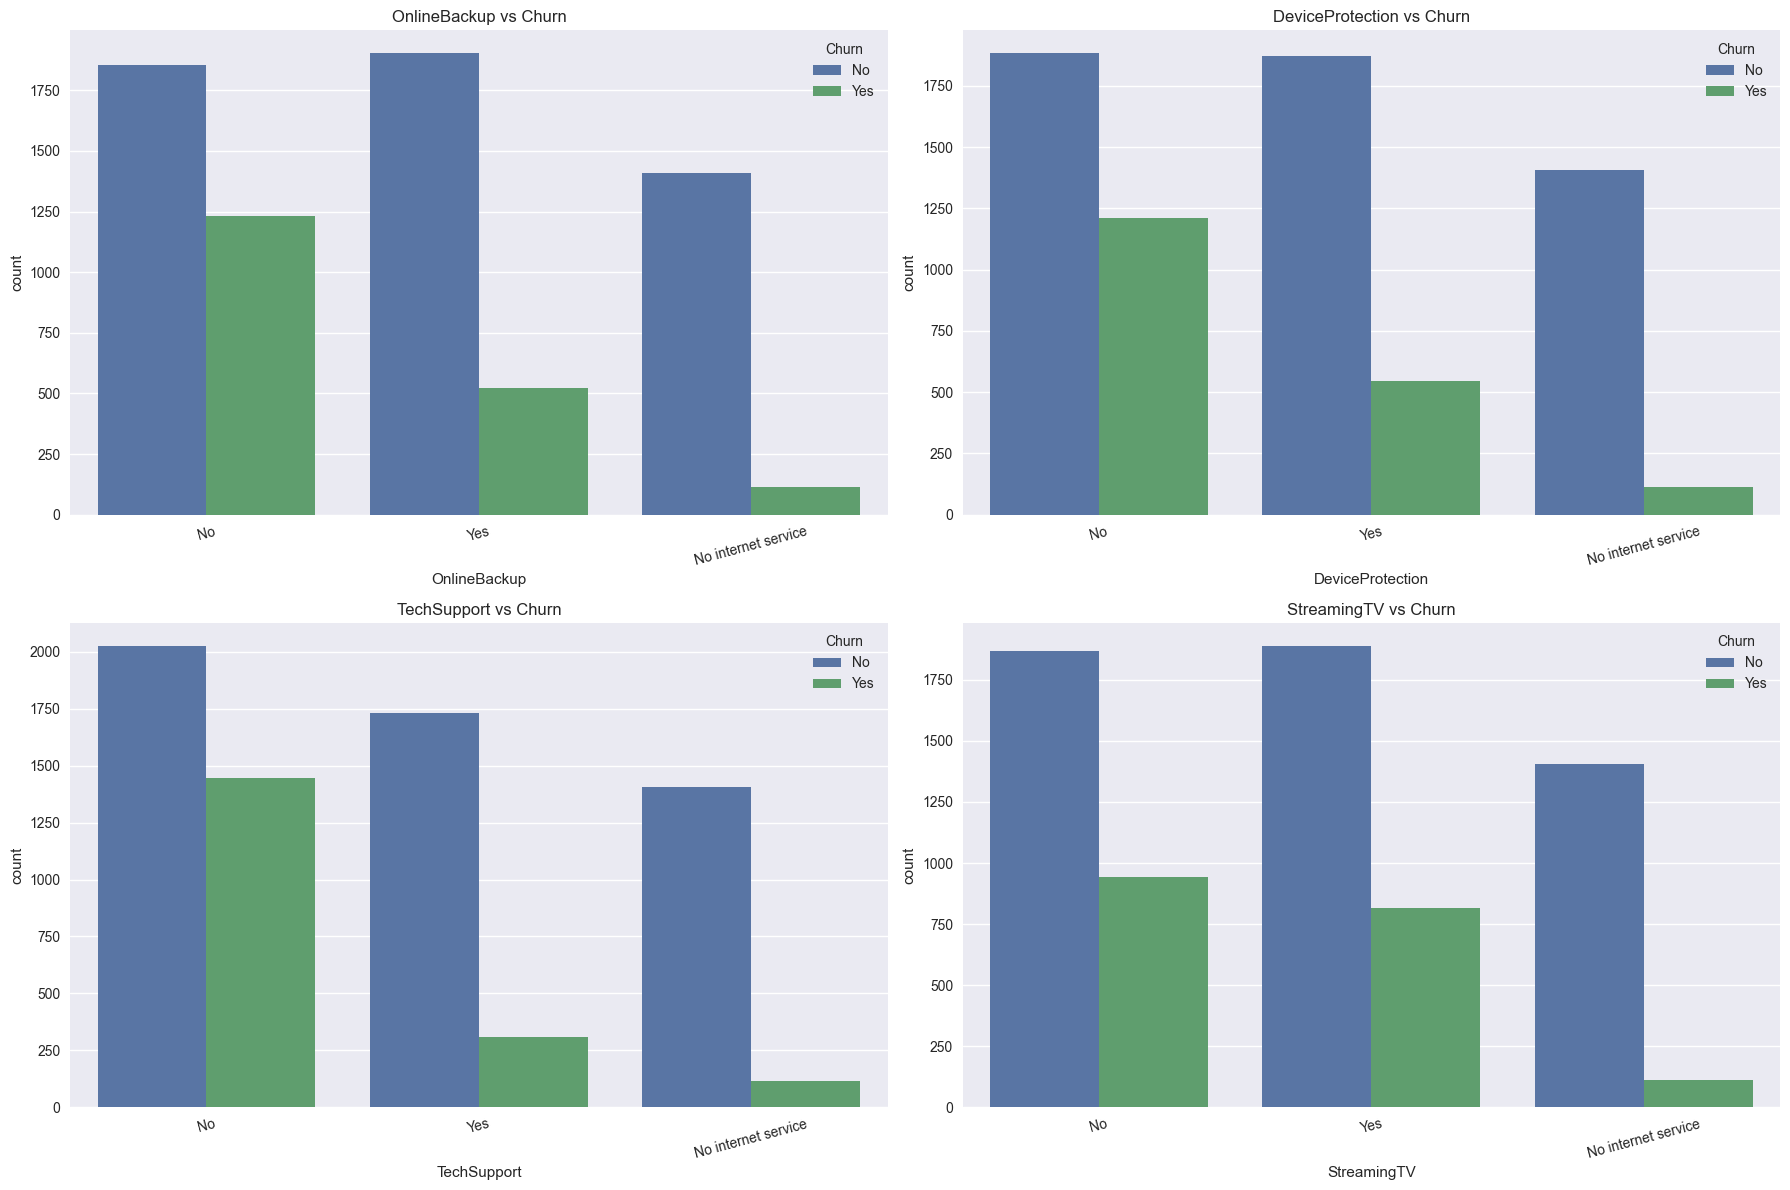

In [51]:
subset = categoricas[8:12]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for j, col in enumerate(subset):
    sns.countplot(x=col, hue="Churn", data=df,
                  order=df[col].value_counts().index,
                  ax=axes[j])
    axes[j].set_title(f"{col} vs Churn")
    axes[j].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


OnlineBackup vs Churn: Los clientes sin respaldo en línea presentan una mayor tasa de churn (~39%) respecto a quienes sí cuentan con este servicio (~21%).
Esto sugiere que el respaldo en la nube se asocia a mayor permanencia, probablemente por generar mayor percepción de seguridad o valor agregado.
* Ofrecer este servicio como complemento puede fortalecer la retención.

DeviceProtection vs Churn: Los clientes sin protección de dispositivos muestran una tasa de churn elevada (~38%) frente a quienes sí utilizan el servicio (~23%).
Esto indica que la protección tecnológica contribuye a reducir el abandono, posiblemente al disminuir costos de reparación o fallas.
* Servicio clave para estrategias de retención y planes premium.

TechSupport vs Churn: Los clientes sin soporte técnico registran una tasa de churn considerablemente mayor (~41%), en comparación con quienes sí tienen soporte (~16%).
Esto revela que la asistencia técnica es uno de los factores más influyentes para evitar la fuga, probablemente por facilitar la resolución de problemas.
* Estrategia prioritaria: incluir soporte técnico en planes base o low-cost.

StreamingTV vs Churn: Los clientes sin servicio de TV en streaming muestran un churn cercano al 34%, mientras que quienes sí lo tienen presentan una tasa levemente menor (~31%).
La diferencia no es tan marcada como en otras variables, pero aún sugiere que los servicios de entretenimiento aportan cierto grado de fidelización.
* Puede potenciarse como complemento, pero su impacto en churn es moderado.

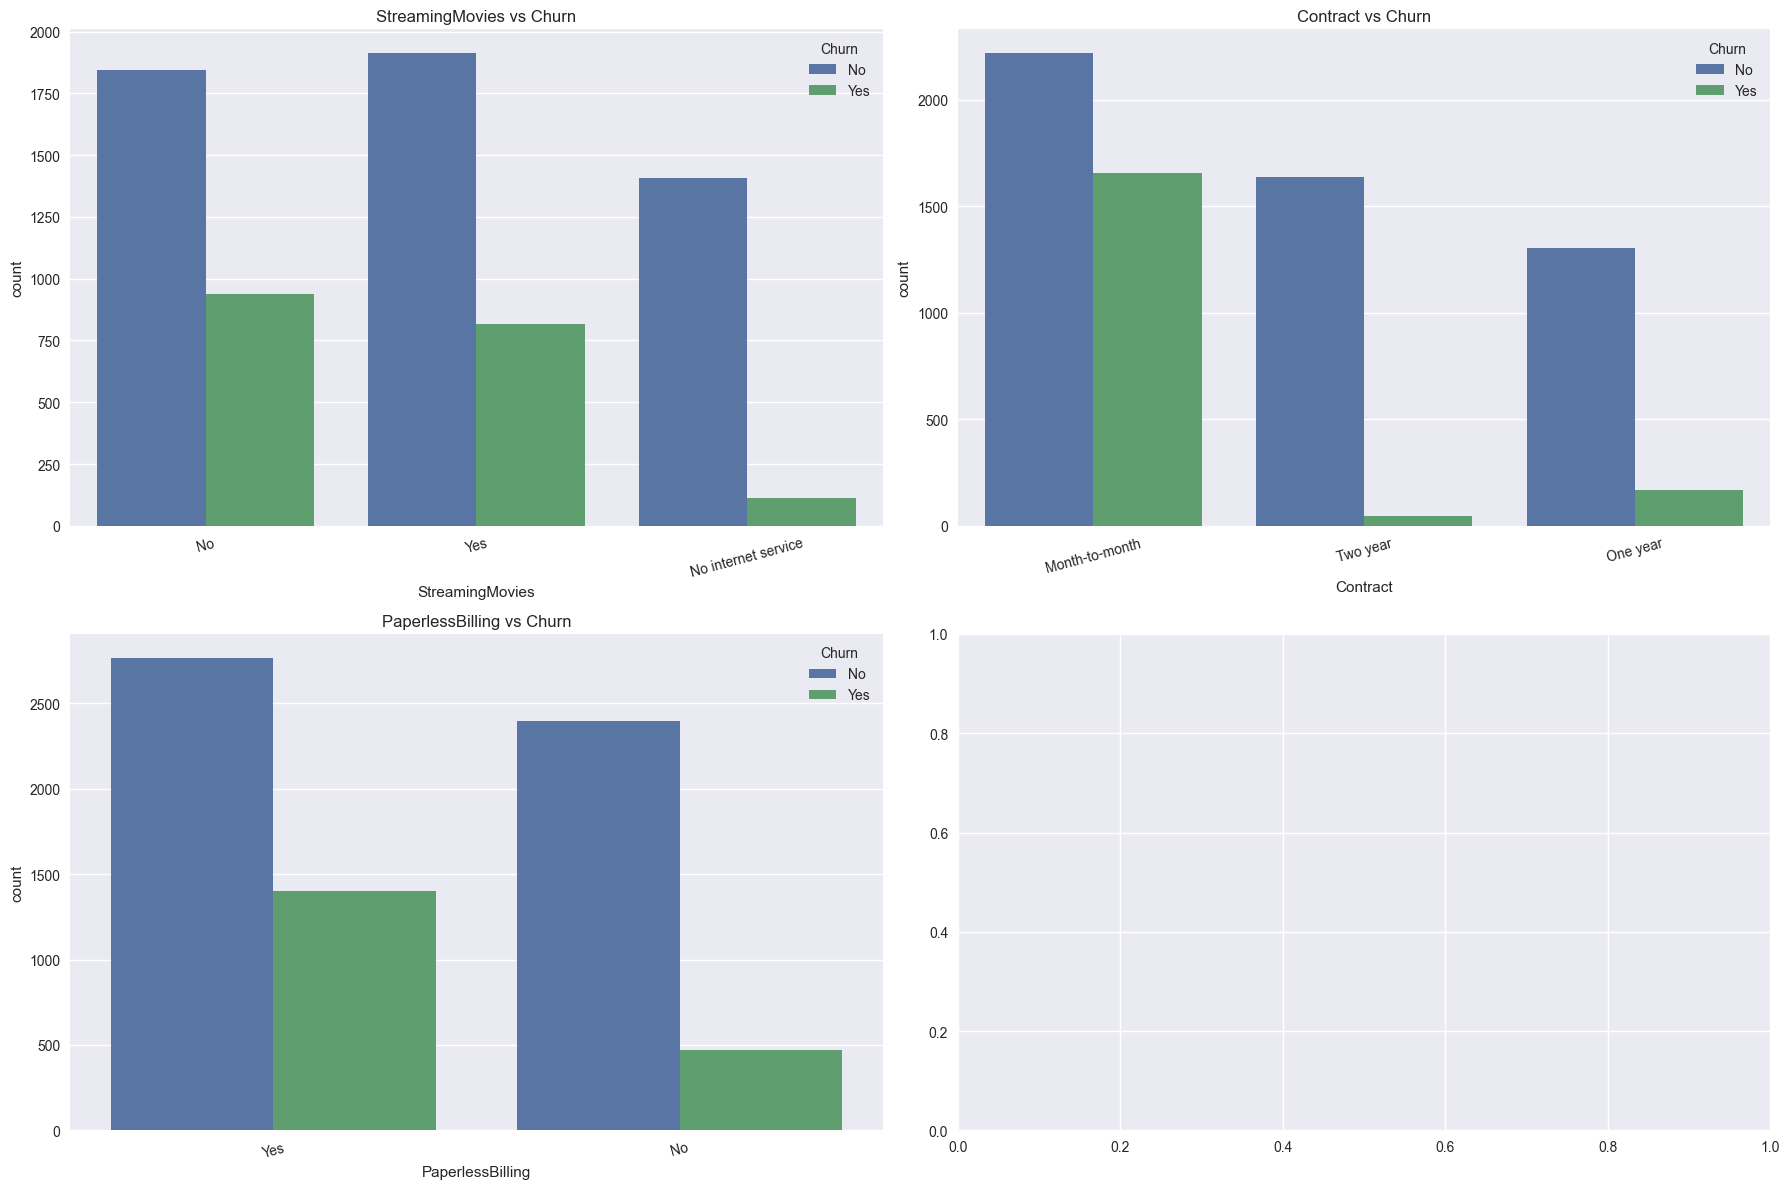

In [52]:
subset = categoricas[12:15]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for j, col in enumerate(subset):
    sns.countplot(x=col, hue="Churn", data=df,
                  order=df[col].value_counts().index,
                  ax=axes[j])
    axes[j].set_title(f"{col} vs Churn")
    axes[j].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

StreamingMovies vs Churn:Los clientes que consumen servicios de películas en streaming presentan tasas de churn similares a quienes no lo tienen (~33% vs ~34%).
El grupo “No internet service” exhibe la tasa de churn más baja, ya que al no usar internet, su exposición a servicios premium es menor. El uso de streaming no parece influir significativamente en el abandono. Este atributo no es determinante por sí solo.

Contract vs Churn : La relación entre tipo de contrato y churn es marcada:

Month-to-month: churn muy elevado
One-year / Two-year: churn drásticamente menor
Esto indica que compromisos contractuales más largos están asociados a mayor permanencia, posiblemente por beneficios económicos o barreras de salida.
El tipo de contrato es un predictor fuerte de churn y un eje clave para estrategias de retención.

PaperlessBilling vs Churn: Los clientes con facturación electrónica presentan un churn mayor (~37%) frente a quienes usan facturación tradicional (~18%).
Esto sugiere que la facturación digital se asocia a perfiles más transaccionales o sensibles al cambio, mientras que quienes reciben facturación física muestran mayor permanencia.PaperlessBilling podría vincularse a clientes más propensos a abandonar y representa un segmento a monitorear.

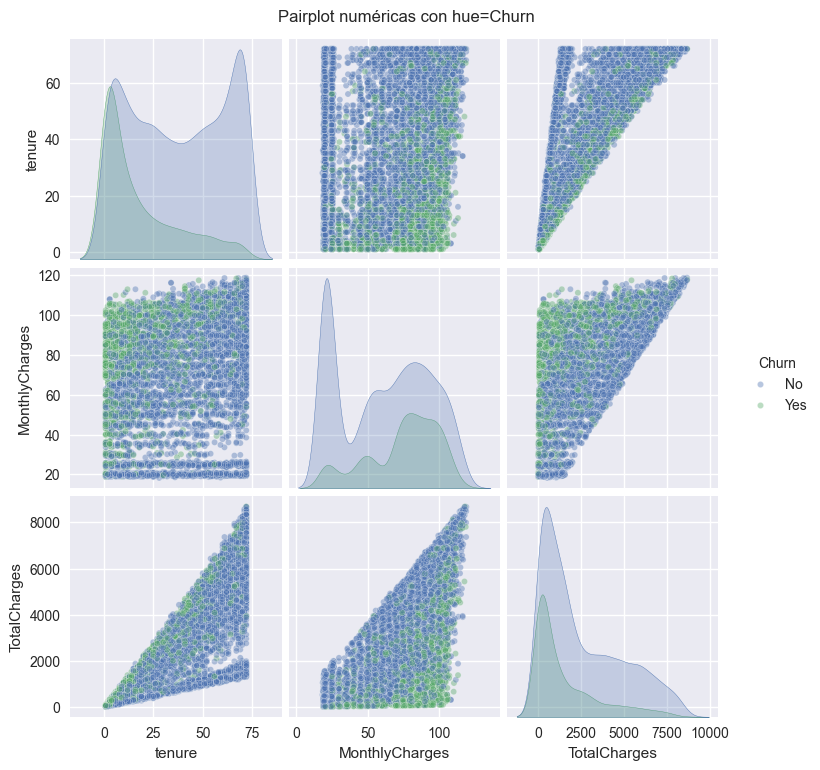

In [57]:
num_cols = ["tenure","MonthlyCharges","TotalCharges"]
sns.pairplot(df[num_cols + ["Churn"]], hue="Churn", diag_kind="kde", plot_kws={"alpha":0.4, "s":20})
plt.suptitle("Pairplot numéricas con hue=Churn", y=1.02)
plt.show()

tenure vs churn: La mayor densidad de clientes que abandonan se concentra en tenures bajos (0–15 meses), confirmando que el churn ocurre mayormente al inicio del ciclo de vida.
Resalta la importancia de fortalecer iniciativas de bienvenida, soporte temprano y ofertas en los primeros meses.

TotalCharges vs tenure: Existe una relación lineal clara: a mayor tenure, mayor TotalCharges acumulado.
Los clientes con churn están más presentes en zonas de bajo TotalCharges, lo que coincide con que tienden a irse pronto.
TotalCharges actúa como proxy de antigüedad; clientes nuevos → mayor churn.

MonthlyCharges vs Churn: Aunque no hay una segmentación perfecta, se percibe mayor proporción de churn en rangos altos de costo mensual (≈70–100 USD).
Indica sensibilidad al precio: usuarios con cargos más altos presentan mayor riesgo de abandono.

MonthlyCharges vs tenure: Se aprecia que clientes con poco tenure y cargos altos tienden a churn más seguido.
Usuarios nuevos + tarifas altas → combinación crítica que incrementa la deserción.

TotalCharges vs MonthlyCharges: Aunque ambas variables se relacionan, no se observa una separación fuerte entre churn/no churn.
Sin embargo, churn ocurre más en niveles bajos de TotalCharges pese a MonthlyCharges moderados/altos.
Clientes nuevos con tarifas altas sienten rápidamente fricción y abandonan.

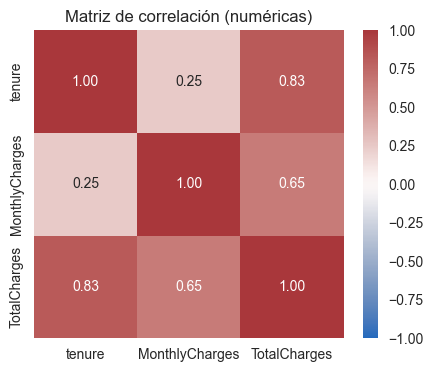

In [58]:
corr = df[num_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1)
plt.title("Matriz de correlación (numéricas)")
plt.show()


Existe una correlación fuertemente positiva (0.83) entre tenure y TotalCharges. Esto indica que, mientras más tiempo permanece un cliente, mayor es el monto total facturado.Refuerza que TotalCharges es prácticamente un indicador de antigüedad del cliente.

MonthlyCharges y TotalCharges (0.65)Correlación positiva moderada (0.65): Clientes con cargos mensuales más altos tienden a acumular mayores cargos totales.
Esto sugiere que los clientes que pagan más al mes suelen tener servicios activos por mayor tiempo o servicios más costosos.

tenure  y MonthlyCharges (0.25) Correlación positiva débil: El tiempo de permanencia no está fuertemente relacionado con el nivel de cobro mensual. Clientes pueden llevar mucho tiempo con tarifas bajas, o poco tiempo con tarifas altas. Por tanto: El churn no se explica únicamente por el precio mensual, sino por la combinación entre costo y antigüedad.

In [59]:
df_num = pd.get_dummies(df, drop_first=True)
df_num['Churn'] = df['Churn'].map({'No':0,'Yes':1})

corr_target = df_num.corr()['Churn'].sort_values(ascending=False)
print(corr_target)


Churn_Yes                                1.000000
Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716


Correlación vs Churn
1) InternetService_Fiber optic (≈ 0.31)_Los clientes con servicio fiber optic presentan mayor probabilidad de churn.
Esto puede deberse a precios altos o expectativas más exigentes en velocidad/servicio. 
* Segmento prioritario para retención (comodidades, descuentos, soporte premium).

2) PaymentMethod_Electronic check (≈ 0.30): El método de pago electronic check está fuertemente asociado al churn.
Esto puede reflejar perfiles menos leales, con mayor rotación, menor bancarización o riesgos financieros.
* Incentivar migración a métodos automáticos.

3) MonthlyCharges (≈ 0.19):A mayor facturación mensual, mayor probabilidad de abandono.
Clientes sensibles a precio parecen abandonar cuando la tarifa es elevada.
* Revisar estructura de precios, planes flexibles y descuentos.

4) PaperlessBilling_Yes (≈ 0.19): Clientes con facturación electrónica muestran mayor churn.
Puede reflejar comportamiento digital, más consciente de precios y con mayor facilidad para migrar.
* Priorizar campañas de retención automático.

5) SeniorCitizen (≈ 0.15):Los adultos mayores presentan mayor tasa de churn.
Pueden chocar con tecnología o buscar planes más económicos.
* Crear planes simplificados o soporte personalizado.

Variables con correlación moderada NEGATIVA
6) Contract_Two year (≈ –0.30):Los contratos de dos años se asocian fuertemente con baja probabilidad de churn.
* Fomentar firma de contratos largos como estrategia de retención.

7) tenure (≈ –0.35): Mayor antigüedad → menor churn.
* Ofrecer beneficios para nuevos clientes durante primeros meses.

8) TotalCharges (≈ –0.20):Mayor facturación total indica mayor tiempo con la empresa → menor churn.
* Similar a tenure: la estabilidad se construye con el tiempo.

9) OnlineSecurity_Yes, TechSupport_Yes, DeviceProtection_Yes (≈ –0.16 a –0.17): Los servicios adicionales reducen churn.
Clientes mejor atendidos o protegidos tienen menos incentivos para irse.
* Potenciar agregados como servicios premium o bundles.

10) Partner_Yes & Dependents_Yes (~ –0.15 a –0.16):Clientes con pareja o dependientes tienden a permanecer más tiempo.
* Hogares son más estables; retención más fácil.

Conclusiones clave del EDA:

* El churn total es cercano al 27%, indicando un reto moderado de retención.
* Tenure, Contract, MonthlyCharges y TotalCharges muestran mayor relación con churn.
* Usuarios nuevos (bajo tenure) representan el segmento más riesgoso.
* Clientes en contratos Month-to-Month y con Internet Fiber Optic presentan más probabilidad de churn.
* Senior citizens, usuarios sin dependientes y sin pareja también muestran tasas mayores.
* No se observan sesgos por género.
* Se identifica potencial de atributos derivados (segmentos de tenure, buckets de MonthlyCharges, etc.).
